In [61]:
#Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [63]:
#data collection and  exploratory data analysis
Insurance_dataset = pd.read_csv("insurance.csv")
Insurance_dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [65]:
Insurance_dataset.shape

(1338, 7)

In [67]:
Insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
Insurance_dataset.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [71]:
Insurance_dataset.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
# Before analysis in depth, data is usually seperated into categorical data and numerical data
# this is because the categorical data cannot be used to train models, but numbers are the key factors in the trainining

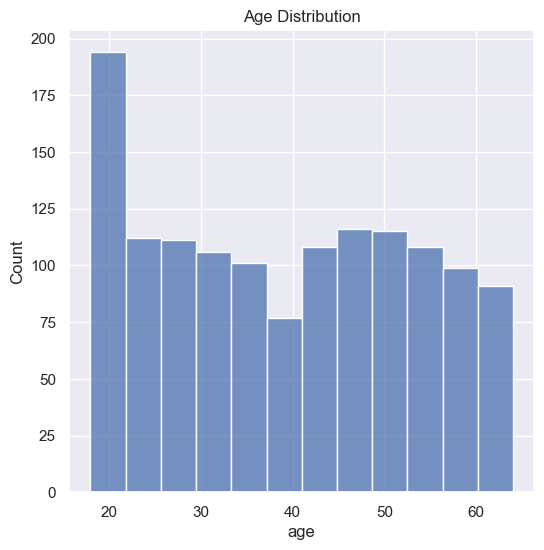

In [75]:
#Analyse age distribution
sns.set()
plt.figure(figsize = (6,6))
sns.histplot(Insurance_dataset['age']) #similarly, you can use distplot in case of histplot
plt.title('Age Distribution')
plt.show()

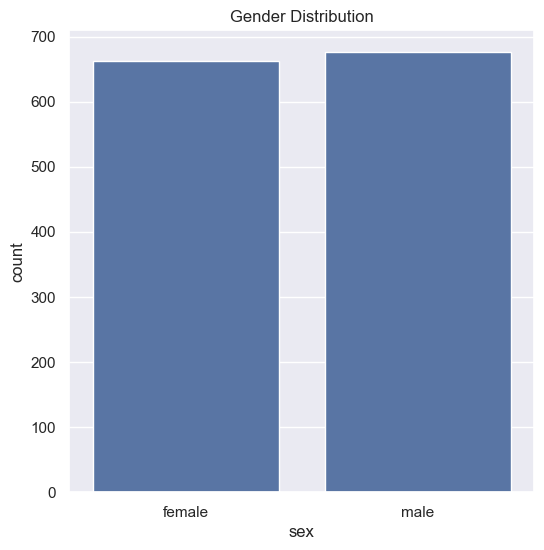

In [77]:
#gender distribution
plt.figure(figsize = (6,6))
sns.countplot(x ='sex', data = Insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [79]:
#alternatively we can do this
Insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

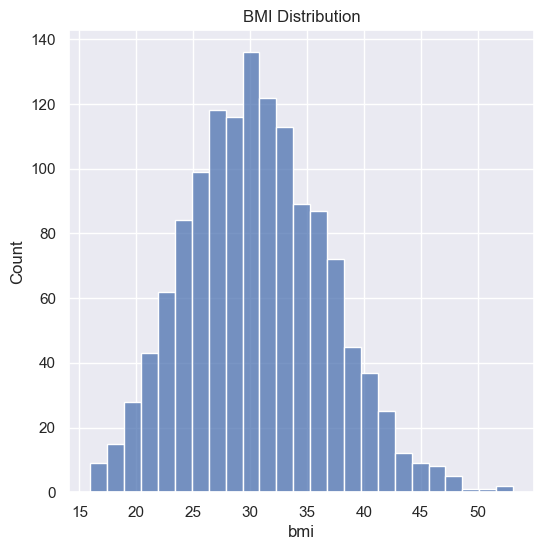

In [81]:
#Body mass index distribution
sns.set()
plt.figure(figsize = (6,6))
sns.histplot(Insurance_dataset['bmi']) #similarly, you can use distplot instead of histplot
plt.title('BMI Distribution')
plt.show()

In [83]:
#normal BMI between 18.5 and 24.9

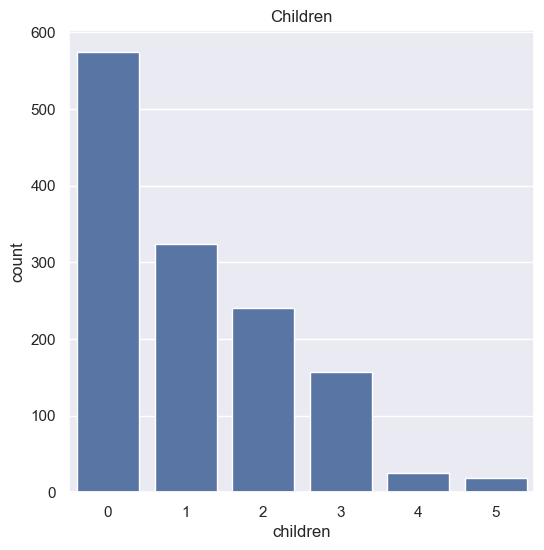

In [85]:
#Distribution of Children Columns
plt.figure(figsize = (6,6))
sns.countplot(x ='children', data = Insurance_dataset)
plt.title('Children')
plt.show()

In [87]:
#alternatively we can do this
Insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

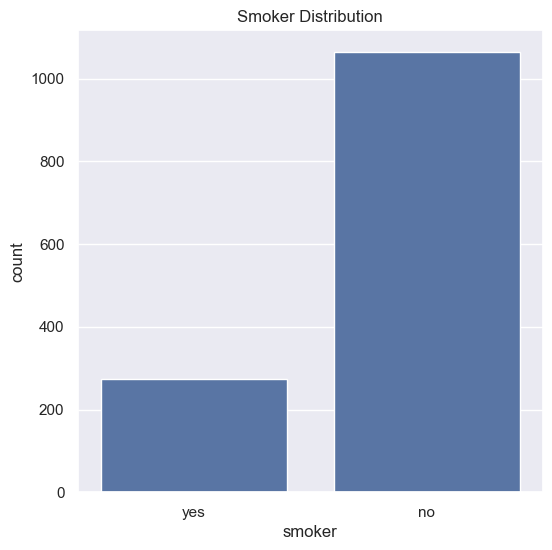

In [89]:
#Distribution of smokers
plt.figure(figsize = (6,6))
sns.countplot(x ='smoker', data = Insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

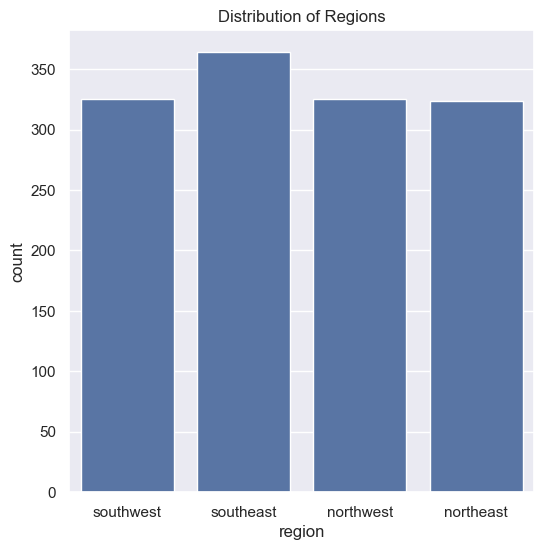

In [91]:
plt.figure(figsize = (6,6))
sns.countplot(x ='region', data = Insurance_dataset)
plt.title('Distribution of Regions')
plt.show()

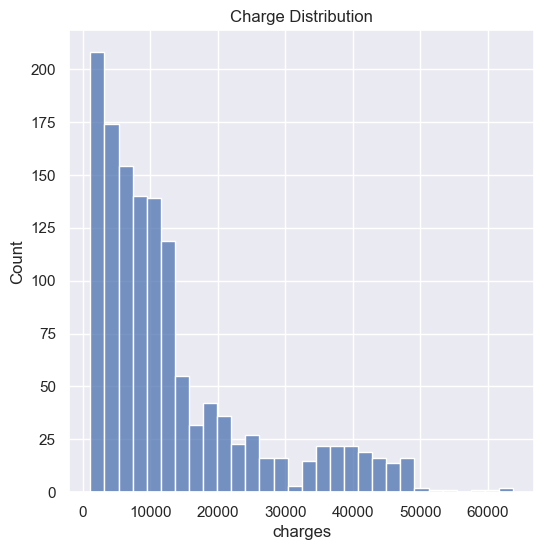

In [93]:
#insurance charge distribution
plt.figure(figsize = (6,6))
sns.histplot(Insurance_dataset['charges']) #similarly, you can use distplot instead of histplot
plt.title('Charge Distribution')
plt.show()

In [96]:
#Data pre-processing
#we have 3 columns with categorical data but the computer only understands numerical data so w e will either drop those columns, or change the categorical data to numerical.


In [104]:
#encoding categorical features
Insurance_dataset.replace({'sex':{'male': 0, 'female': 1}}, inplace = True) #encoding sex column
Insurance_dataset.replace({'smoker':{'no': 0, 'yes': 1}}, inplace = True) #encoding smoker column
Insurance_dataset.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace = True) #encoding region column
#Insurance_dataset = Insurance_dataset.infer_objects(copy=False)# Explicitly infer object types without copying
Insurance_dataset.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       1  16884.92400
1   18    0  33.770         1       0       0   1725.55230
2   28    0  33.000         3       0       0   4449.46200
3   33    0  22.705         0       0       3  21984.47061
4   32    0  28.880         0       0       3   3866.85520

In [106]:
#Splitting the feature and target
#we split the features (input variables) and target (output variable) to clearly define what the model will learn from and what it will predict.


In [110]:
X = Insurance_dataset.drop(columns = 'charges' , axis = 1)
Y = Insurance_dataset['charges'] #y=f(x)
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [113]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [123]:
#Splitting the data into training and testing set .
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [127]:
#Model training
regressormodel = LinearRegression()
#fit model
regressormodel.fit(X_train, Y_train)

LinearRegression()

In [133]:
#Evaluate model
y_train_pred = regressormodel.predict(X_train)
y_train_pred

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [137]:
#R squared values
r2_train = metrics.r2_score(Y_train, y_train_pred)
print('R2 value: ', r2_train)#value ususally between 0 and 1

R2 value:  0.751505643411174


In [141]:
#prediction on testing set
y_test_pred = regressormodel.predict(X_test)
y_test_pred

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [143]:
r2_test = metrics.r2_score(Y_test, y_test_pred)
print('R2 value: ', r2_test)#value ususally between 0 and 1

R2 value:  0.7447273869684076


In [149]:
#Building a predictive system
Input_data = (31, 1, 25.74, 0, 0, 0) #tuples in python
#input data as an array
input_data_as_array = np.asarray(Input_data)
#reshape data
input_data_reshape = input_data_as_array.reshape(1, -1)
#make prediction
prediction = regressormodel.predict(input_data_reshape)
#print prediction
print(prediction)
print('The insurance cost in USD is: ', prediction[0])

[3760.0805765]
The insurance cost is:  [3760.0805765]


C:\Users\nibam\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
